<a href="https://colab.research.google.com/github/michel-phylo/Adera2.0/blob/main/Adera_validate_CNV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
!ls
%cd gdrive/MyDrive
!ls

Mounted at /content/gdrive/
gdrive	sample_data


In [ ]:
!pip3 install tensorflow

from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from tensorflow.keras.constraints import max_norm

import pandas as pd

In [ ]:
import pandas as pd

first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
first_data_adera
first_data_adera1= first_data_adera.dropna(axis = 0, how ='any')
first_data_adera1
first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Cancer_type', 'Freq'], ascending=[True, True, False])
first_data_adera4 = first_data_adera3.drop_duplicates(subset=['Gene'], keep='first')
first_data_adera4
#first_data_adera4["Cancer_type"].unique()

In [ ]:
# getting the distribution of CNA

# Get the count for each chromosome
cna_counts = first_data_adera4["CNA"].value_counts()

# Calculate the total number of rows
total_rows = len(first_data_adera4)

# Calculate the probability for each chromosome
cna_probabilities = cna_counts / total_rows

# Print the count and probability for each chromosome
for cna, count in cna_counts.items():
    probability = cna_probabilities[cna]
   # print(f"Chromosome {chromosome}: Count={count}, Probability={probability}")
    print(f"{cna}, {probability}")



AMP, 0.7864834230660244
HOMDEL, 0.21351657693397563


In [ ]:
# gettin the distrubition of cancer types

# Get the unique categories in the "Cancer_type" column
unique_categories = first_data_adera4["Cancer_type"].unique()

# Get the count for each category
category_counts = first_data_adera4["Cancer_type"].value_counts()

# Print the count for each category
for category in unique_categories:
    count = category_counts[category]
    print(f"{category}: {count}")

total_rows = len(first_data_adera4["Cancer_type"])
category_probabilities = category_counts / total_rows
print("Saint Macarious")
print("                 ")
# Print the probability for each category
for category, probability in category_probabilities.items():
    print(f"{category}: {probability}")

In [ ]:
category_counts.shape

(20,)

In [ ]:
# getting the distrubition of the chromomes

# Get the count for each chromosome
chromosome_counts = first_data_adera4["chromosome"].value_counts()

# Calculate the total number of rows
total_rows = len(first_data_adera4)

# Calculate the probability for each chromosome
chromosome_probabilities = chromosome_counts / total_rows

# Print the count and probability for each chromosome
for chromosome, count in chromosome_counts.items():
    probability = chromosome_probabilities[chromosome]
   # print(f"Chromosome {chromosome}: Count={count}, Probability={probability}")
    print(f"{chromosome}, {probability}")




In [ ]:
chromosome_counts.shape

(24,)

In [ ]:
import random
import numpy as np

# Define the number of rows in the synthetic dataset
num_rows = 7058

# Define the possible states for CNA and Strand
cna_states = ["AMP", "HOMDEL"]
strand_states=[77,3]


# Define the list of cancer types and their corresponding probabilities
cancer_types = ['Testicular_Germ_Cell_Tumors', 'Cervical_Squamous_Cell_Carcinoma',
       'Renal_Clear_Cell_Carcinoma', 'Serous_Ovarian_Cancer',
       'Colorectal_Adenocarcinoma', 'Esophageal_Adenocarcinoma',
       'Breast_Invasive_Ductal_Carcinoma',
       'Diffuse_Large B-Cell_Lymphoma', 'Cholangiocarcinoma',
       'Uveal Melanoma', 'Bladder_Urothelial_Carcinoma', 'Sarcoma',
       'Liver_Hepatocellular_Carcinoma', 'Adrenocortical_Carcinoma',
       'Prostate_Adenocarcinoma', 'Lung', 'Glioblastoma_Multiforme',
       'Brain_Lower_Grade_Glioma', 'Head_and_Neck_Squamous',
       'Skin_Cutaneous_Melanoma']
chromosome_number1=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

CNA_probability=[0.7864834230660244,0.21351657693397563]


chromsome_number_probability=[0.18192122414281667, 0.014310002833663928, 0.0850099178237461, 0.005525644658543496, 0.07155001416831963, 0.10541229810144517, 0.06574100311703032
, 0.1017285349957495, 0.005100595069424767, 0.00793425899688297, 0.043213374893737604
, 0.04703882119580618, 0.021535845848682348, 0.0076508926041371494, 0.0076508926041371494
, 0.0005667327854916407, 0.06276565599319921, 0.004817228676678946, 0.06857466704448853
, 0.05950694247662227, 0.0038254463020685747, 0.00892604137149334, 0.00014168319637291018, 0.019552281099461603]

cancer_type_probabilities = [ 0.1517427033153868,0.14267497874752055,0.1282232927174837,
0.12156418248795693,0.08671011618022102,0.06729951827713233,0.05738169453102862,0.04052139416265231,0.03924624539529612,
 0.03655426466421082,0.030036837631056957,0.02592802493624256,0.02422782657976764,0.018702181921224144,0.015018418815528478,
                              0.007509209407764239,0.005525644658543496, 0.0004250495891187305,0.0004250495891187305,0.00028336639274582036]


# Generate the synthetic dataset
adera_synthetic_dataset = []

# Create a probability distribution from the provided probabilities
cna_distribution = np.random.choice(cna_states, size=num_rows, p=CNA_probability)
cancer_type_distribution = np.random.choice(cancer_types, size=num_rows, p=cancer_type_probabilities)
adera_chromsome_number_distribution = np.random.choice(chromosome_number1, size=num_rows, p=chromsome_number_probability)

for i in range(num_rows):
    gene_name = "Gene" + str(i + 1)  # Generate a unique gene name
    cna = cna_distribution[i] # Randomly select a CNA state
    #chromosome_number = random.choice(range(1, 24))  # Randomly select a chromosome number
    chromosome_number=adera_chromsome_number_distribution[i]
    start = random.randint(1, 1000)  # Generate a random start position
    end = random.randint(start + 1, 2000)  # Generate a random end position greater than start
    strand = random.choice(strand_states)  # Randomly select a strand
    cancer_type = cancer_type_distribution[i]  # Select cancer type based on the generated distribution

    row = [gene_name, cna, chromosome_number, start, end, strand, cancer_type]
    adera_synthetic_dataset.append(row)

# Print the synthetic dataset
#for row in adera_synthetic_dataset:
    #print(row)


In [ ]:
num_rows

7058

In [ ]:
import pandas as pd

# Assuming adera_synthetic_dataset is a list of rows with the desired data

# Convert adera_synthetic_dataset to a DataFrame
first_data_adera5= pd.DataFrame(adera_synthetic_dataset, columns=['Gene', 'CNA', 'chromosome', 'start', 'end', 'strand', 'Cancer_type'])

# Print the DataFrame
first_data_adera5
k1=first_data_adera5["Cancer_type"].unique()
print(k1.shape[0])

20


In [ ]:
first_data_adera5

,Gene,CNA,chromosome,start,end,strand,Cancer_type
0,Gene1,AMP,17,729,1643,3,Cervical_Squamous_Cell_Carcinoma
1,Gene2,AMP,11,489,1272,77,Esophageal_Adenocarcinoma
2,Gene3,AMP,8,181,1938,3,Renal_Clear_Cell_Carcinoma
3,Gene4,AMP,6,663,1250,3,Testicular_Germ_Cell_Tumors
4,Gene5,AMP,1,315,1438,3,Sarcoma
...,...,...,...,...,...,...,...
7053,Gene7054,AMP,1,42,547,3,Bladder_Urothelial_Carcinoma
7054,Gene7055,AMP,8,915,1758,77,Cervical_Squamous_Cell_Carcinoma
7055,Gene7056,AMP,19,800,1032,77,Colorectal_Adenocarcinoma
7056,Gene7057,HOMDEL,19,416,1961,3,Renal_Clear_Cell_Carcinoma


In [ ]:
#First_data_adera3a= first_data_adera4[first_data_adera3['Cancer_type'] == 'Cervical_Squamous_Cell_Carcinoma']
#First_data_adera3b1= first_data_adera4[first_data_adera3['Cancer_type'] == 'Serous_Ovarian_Cancer']
#First_data_adera3b2= first_data_adera4[first_data_adera3['Cancer_type'] == 'Breast_Invasive_Ductal_Carcinoma']
#First_data_adera3b3= first_data_adera4[first_data_adera3['Cancer_type'] == 'Uterine_Corpus_Endometrial_Carcinoma']

#First_data_adera3c = pd.concat([First_data_adera3a, First_data_adera3b1,First_data_adera3b2,First_data_adera3b3])
#First_data_adera3c = pd.concat([First_data_adera3a, First_data_adera3b1])

In [ ]:
First_data_adera3c=first_data_adera5


In [ ]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(First_data_adera3c["CNA"])
Adera_CNA= encoder.transform(First_data_adera3c["CNA"])

Adera_CNA1= np_utils.to_categorical(Adera_CNA,num_classes=4)
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
Adera_CNA1.shape #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(First_data_adera3c ['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states
Adera_chromosome=First_data_adera3c['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)

Adera_start=First_data_adera3c['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=First_data_adera3c['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=First_data_adera3c['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)

#Adera_freq=First_data_adera3c['Freq']
#Adera_freq1=np.array(Adera_freq)
#Adera_freq2=Adera_freq1.reshape(Input_net_Adera1.shape[0],1)
#normalise chromsoem numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape
k1=First_data_adera3c["Cancer_type"].unique()
print(k1.shape[0])
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
Adera_CNA1
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape
Output_net_Adera=First_data_adera3c[["Cancer_type"]]
Output_net_Adera
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(Output_net_Adera)
#Output_net_Adera1 = encoder.transform(Output_net_Adera)

#Output_net_Adera1 = np_utils.to_categorical(Output_net_Adera1,num_classes=3)
#Output_net_Adera1



encoder = LabelEncoder()
encoder.fit(First_data_adera3c[["Cancer_type"]])
Output_net_Adera1 = encoder.transform(First_data_adera3c[["Cancer_type"]])

Output_net_Adera2= np_utils.to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])



20


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
Output_net_Adera1
Output_net_Adera2= np_utils.to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])
Output_net_Adera2.shape
Output_net_Adera2
Input_Adera_numpy2=Input_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,8) #7 input values

Output_net_Adera3=Output_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,k1.shape[0]) #7 cancer types
Output_net_Adera3
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras import regularizers
import numpy as np
Output_net_Adera3.shape

(7058, 1, 1, 20)

In [ ]:

adera_47_40_model = tf.keras.saving.load_model("adera+87+90+20")

In [ ]:
First_data_adera3c["Cancer_type"].unique()

array(['Cervical_Squamous_Cell_Carcinoma', 'Esophageal_Adenocarcinoma',
       'Renal_Clear_Cell_Carcinoma', 'Testicular_Germ_Cell_Tumors',
       'Sarcoma', 'Colorectal_Adenocarcinoma', 'Cholangiocarcinoma',
       'Serous_Ovarian_Cancer', 'Diffuse_Large B-Cell_Lymphoma',
       'Liver_Hepatocellular_Carcinoma',
       'Breast_Invasive_Ductal_Carcinoma', 'Bladder_Urothelial_Carcinoma',
       'Uveal Melanoma', 'Adrenocortical_Carcinoma',
       'Prostate_Adenocarcinoma', 'Glioblastoma_Multiforme', 'Lung',
       'Head_and_Neck_Squamous', 'Skin_Cutaneous_Melanoma',
       'Brain_Lower_Grade_Glioma'], dtype=object)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_adera = {
    "types": First_data_adera3c["Cancer_type"].unique()
}

thresholds = np.arange(0.18, 0.68, 0.002)  # Threshold values from 0.1 to 10
num_runs = 1  # Number of runs per threshold
mean_accuracies = []  # List to store mean accuracy values
std_deviations = []  # List to store standard deviation values

for threshold in thresholds:
    accuracies = []  # List to store accuracy values for each threshold

    for _ in range(num_runs):
        for _ in range(3):
            adera_test1 = random.randint(0, Adera_chromosome4.shape[0] - 1)
            test_mac = Input_Adera_numpy2[adera_test1].reshape(1, 1, 1, 8)
            adera_result = adera_47_40_model.predict(test_mac)
            adera_result_thresholded = (adera_result >= threshold).astype(int)
            adera_result5 = np.argmax(adera_result_thresholded)

            if data_adera['types'][adera_result5] == First_data_adera3c['Cancer_type'].iloc[adera_test1]:
                accuracies.append(1)  # Correct prediction
            else:
                accuracies.append(0)  # Incorrect prediction

    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)
    std_deviation = np.std(accuracies)
    std_deviations.append(std_deviation)

    #print(f"Threshold: {threshold:.2f}")
    #print(f"Mean Accuracy: {mean_accuracy:.2f}")
    #print(f"Standard Deviation: {std_deviation:.2f}")
    #print()




1/1 [==============================] - 0s 27ms/step


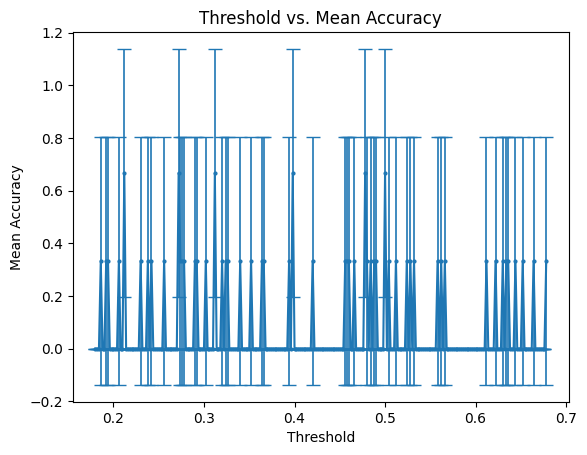

In [ ]:
# Plotting threshold vs. mean accuracy with error bars representing standard deviation
plt.errorbar(thresholds, mean_accuracies, yerr=std_deviations, fmt='o-', capsize=5, markersize=2, elinewidth=1.2)
plt.xlabel('Threshold')
plt.ylabel('Mean Accuracy')
plt.title('Threshold vs. Mean Accuracy')
plt.show()


In [ ]:
first_data_adera=pd.read_table('senstivity_adera_analysis.txt',delimiter='\t',engine='python')
first_data_adera

,Batch size,Learning Rate,clip norm,validtaion split,accuracy,loss
0,50,0.002,0.04,0.1,0.89,0.27
1,400,0.002,0.04,0.1,0.90,0.32
2,50,0.002,0.08,0.1,0.92,0.28
3,400,0.002,0.08,0.1,0.87,0.37
4,50,0.002,0.12,0.1,0.91,0.26
5,400,0.002,0.12,0.1,0.87,0.40
6,50,0.002,0.16,0.1,0.91,0.25
7,400,0.002,0.16,0.1,0.87,0.35
8,50,0.002,0.20,0.1,0.91,0.26
9,400,0.002,0.20,0.1,0.87,0.38


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame (replace 'data.csv' with your actual file name)
df = first_data_adera



# Create a scatter plot for Batch Size versus Accuracy
plt.figure(figsize=(8, 6))
plt.scatter(df['Batch size'], df['accuracy'])
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Batch Size vs. Accuracy')

# Connect each pair of consecutive points with lines
for i in range(0, len(df)-1, 2):
    x_values = [first_data_adera['Batch size'].iloc[i], first_data_adera['Batch size'].iloc[i+1]]
    y_values = [first_data_adera['accuracy'].iloc[i], first_data_adera['accuracy'].iloc[i+1]]
    plt.plot(x_values, y_values, color='black')

plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-130-2240cdc8ef0a>", line 13, in <cell line: 13>
    df = pd.read_csv('data.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine = self._make_engine(f,